In [13]:
import time
import torch
import numpy as np
from multiprocessing import Pool

#from ENV import KYenv
from env import Env
from controller_vbc import VDN_MAC
from q_learner_vdn_vbc import QLearner
from run import run
from parallel_run_kit import ParallelRun

import matplotlib.pyplot as plt

In [14]:
# Generate the original position of UEs

#t_ues = torch.rand(10, 2) * torch.Tensor([40, 40])
'''
tensor([[14.6263, 34.7260],
        [ 1.9140, 21.8183],
        [ 2.2632, 30.5218],
        [ 0.6944, 11.3171],
        [22.5929, 38.7681],
        [23.7638, 17.0285],
        [ 6.9659,  8.9016],
        [12.5943, 38.1162],
        [36.4007,  4.6886],
        [21.0985,  6.8055]])

'''
#print(t_ues)
'''
t_ues = torch.tensor([[ 2.3219, 35.5963],
        [ 4.9058,  7.3772],
        [34.1434, 36.6237],
        [30.3456, 22.6366],
        [26.9608, 20.9890],
        [19.3620, 32.8353],
        [12.3929, 39.7321],
        [ 5.9339, 29.5289],
        [33.2905, 37.5042],
        [ 9.2728, 15.3940]])
'''

t_ues = []
#seeds = [0, 5, 3, 6, 9, 14, 16, 25, 22, 29]
#seeds = [0, 5, 3, 25, 22, 29]
#for i in seeds:
#    torch.manual_seed(i)
#    t_ues.append(torch.rand(10, 2) * torch.Tensor([40, 40]))

torch.manual_seed(0)
t_ues = torch.rand(10, 2) * torch.Tensor([40, 40])
torch.manual_seed(time.time())

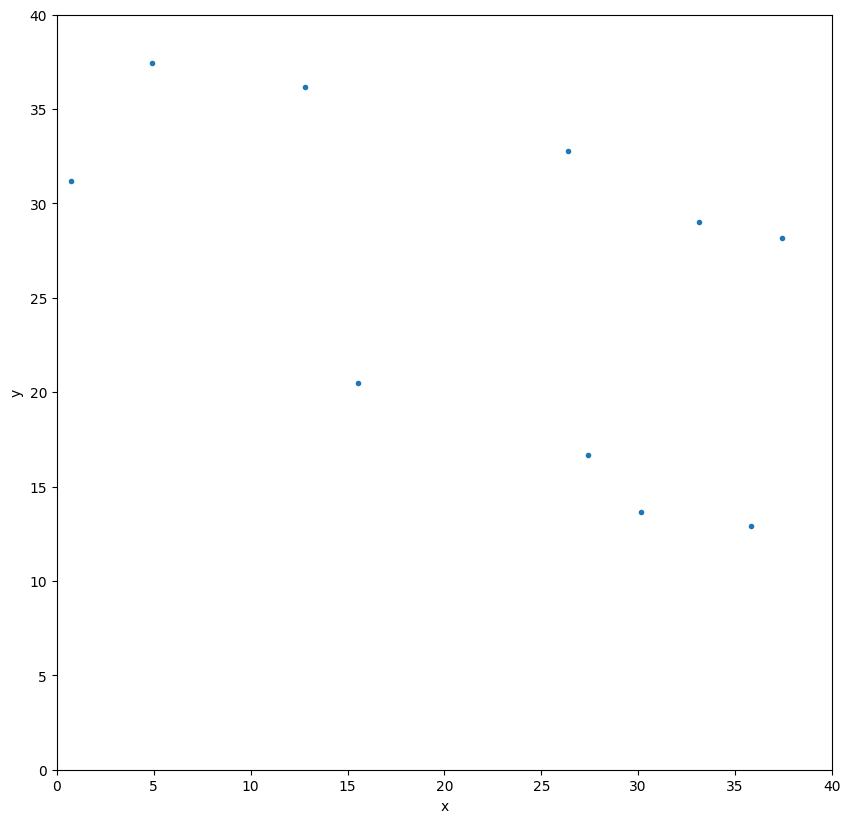

In [47]:
# draw UEs position

plt.figure(dpi=100, figsize=[10, 10])
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.plot(t_ues[:, 0], t_ues[:, 1], '.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
# initialize environments, agents and learner

# initialize environment
#env = KYenv(4, 24, 500)
rw = 0.01
noise_dbm = -85.
env = Env(border=torch.Tensor([40, 40]), 
          enbs = torch.Tensor([[10, 10, 10], 
                               [10, 30, 10], 
                               [10, 10, 30],
                               [10, 30, 30]]), 
          ues = t_ues, 
          noise = 10**(noise_dbm / 10. - 3.),
          rw = rw
          )
'''
env2 = Env(border=torch.Tensor([40, 40]), 
          enbs = torch.Tensor([[10, 10, 10], 
                               [10, 30, 10], 
                               [10, 10, 30],
                               [10, 30, 30]]), 
          ues = t_ues_2, 
          noise = 10**(noise_dbm / 10. - 3.),
          rw = rw
          )
'''

# set saving directory/name
filename = 'AP4UE10L40RW1IR0NOI85SEED_0_nocommu_720'
#xx = torch.load('exp_res/AP4UE10L40RW1IR0NOI85SEED_set6_nocommu_706.pth')
# enable cuda in training
cuda_flag = True

# initialize learner
controller = VDN_MAC(n_agents = 4) #n_actions = 6 * 5, input_shape = 11
controller.save('state_dicts/' + filename + '.pth') # save
#controller.agent.load_state_dict(xx['net_sd']['agent'])
#controller.env_blender.load_state_dict(xx['net_sd']['blender'])
learner = QLearner(controller, info_reg = 0.0)
#learner.mixer.load_state_dict(xx['qmixer'])
if cuda_flag:
    learner.cuda()

# initialize test learner
test_controller = VDN_MAC(n_agents = 4) #n_actions = 6 * 5, input_shape = 11, n_size = 256
test_controller.load('state_dicts/' + filename + '.pth')
#test_controller.agent.load_state_dict(xx['net_sd']['agent'])
#test_controller.env_blender.load_state_dict(xx['net_sd']['blender'])
for par in test_controller.env_blender.parameters():
    par.requires_grad = False
for par in test_controller.agent.parameters():
    par.requires_grad = False

In [16]:
#epi_length = 0
#epi_length_step = 100

# set batch size
batch_size = 10

# initialze reward and loss saving container
r_history = []
loss_history = []
mess_history = []

0
loss:  0.13019070029258728    grad:  11.106498718261719
1
loss:  0.1267240196466446    grad:  7.950093746185303
2
loss:  0.1115395575761795    grad:  2.407395601272583
3
loss:  0.11847808957099915    grad:  4.631014823913574
4
loss:  0.12725648283958435    grad:  8.578641891479492
5
loss:  0.12990012764930725    grad:  10.059439659118652
6
loss:  0.1230841651558876    grad:  8.480085372924805
7
loss:  0.1160641610622406    grad:  4.31309700012207
8
loss:  0.1098196730017662    grad:  1.420533299446106
9
loss:  0.11369731277227402    grad:  6.027322769165039


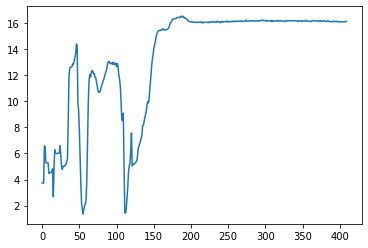

10
loss:  0.12451045960187912    grad:  7.84962797164917
11
loss:  0.12492968887090683    grad:  8.321863174438477
12
loss:  0.11347457766532898    grad:  6.077578544616699
13
loss:  0.1104542538523674    grad:  1.423065185546875
14
loss:  0.1098625436425209    grad:  3.990602970123291
15
loss:  0.11625899374485016    grad:  6.076321601867676
16
loss:  0.11845793575048447    grad:  6.5720648765563965
17
loss:  0.11765294522047043    grad:  6.073644638061523
18
loss:  0.11607455462217331    grad:  3.132859945297241
19
loss:  0.1113409548997879    grad:  0.7748739719390869


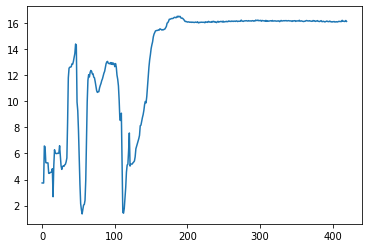

20
loss:  0.11925160884857178    grad:  3.8266444206237793
21
loss:  0.1181277334690094    grad:  5.47681999206543
22
loss:  0.11234830319881439    grad:  6.289816856384277
23
loss:  0.11492418497800827    grad:  3.939323663711548
24
loss:  0.10662364959716797    grad:  0.9942759871482849
25
loss:  0.10555747896432877    grad:  1.993526816368103
26
loss:  0.11347371339797974    grad:  4.12017297744751
27
loss:  0.11614485830068588    grad:  5.209861755371094
28
loss:  0.1101173385977745    grad:  4.872109413146973
29
loss:  0.10889535397291183    grad:  2.3158295154571533


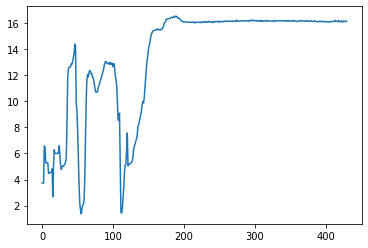

30
loss:  0.10481751710176468    grad:  0.4747511148452759
31
loss:  0.10711237788200378    grad:  2.4576871395111084
32
loss:  0.10923009365797043    grad:  4.989083290100098
33
loss:  0.11301763355731964    grad:  4.957286834716797
34
loss:  0.11230216920375824    grad:  3.5694515705108643
35
loss:  0.10743895173072815    grad:  0.4617566764354706
36
loss:  0.10704388469457626    grad:  1.7993422746658325
37
loss:  0.11374963819980621    grad:  3.085296869277954
38
loss:  0.1109597235918045    grad:  2.9796559810638428
39
loss:  0.1118323802947998    grad:  4.444834232330322


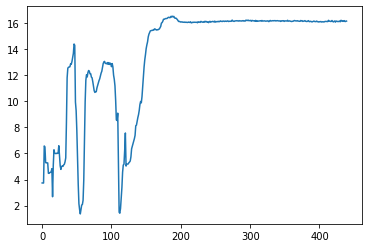

40
loss:  0.10894568264484406    grad:  2.177485942840576
41
loss:  0.11072774976491928    grad:  0.7694119811058044
42
loss:  0.11049787700176239    grad:  1.8000619411468506
43
loss:  0.10726501792669296    grad:  3.48795485496521
44
loss:  0.10987824946641922    grad:  3.203366756439209
45
loss:  0.10846908390522003    grad:  3.8578929901123047
46
loss:  0.106314517557621    grad:  1.1002956628799438
47
loss:  0.11117643862962723    grad:  0.9246253967285156
48
loss:  0.11144381016492844    grad:  2.8095543384552
49
loss:  0.10971873998641968    grad:  3.3612465858459473


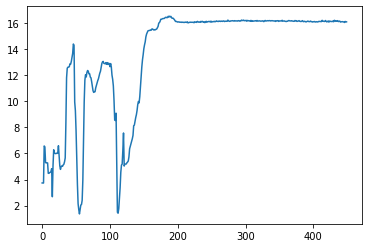

50
loss:  0.10651560872793198    grad:  3.2107579708099365
51
loss:  0.10787271708250046    grad:  2.264172315597534
52
loss:  0.10367940366268158    grad:  0.6306309700012207
53
loss:  0.1039562001824379    grad:  1.2234563827514648
54
loss:  0.10484171658754349    grad:  2.968980312347412
55
loss:  0.10011523962020874    grad:  2.4479427337646484
56
loss:  0.10827029496431351    grad:  2.512213706970215
57
loss:  0.10293973982334137    grad:  1.7604458332061768
58
loss:  0.10545279830694199    grad:  0.5958926677703857
59
loss:  0.10140351951122284    grad:  1.3961325883865356


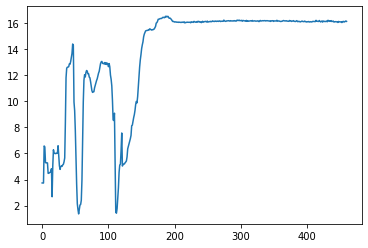

60
loss:  0.10653319209814072    grad:  2.6332743167877197
61
loss:  0.10877444595098495    grad:  3.1005048751831055
62
loss:  0.10255330801010132    grad:  2.6597044467926025
63
loss:  0.10290222615003586    grad:  1.3263784646987915
64
loss:  0.10835106670856476    grad:  1.3780664205551147
65
loss:  0.10067812353372574    grad:  1.2745840549468994
66
loss:  0.10374410450458527    grad:  2.890109062194824
67
loss:  0.10492707788944244    grad:  2.1091299057006836
68
loss:  0.10405491292476654    grad:  2.217633008956909
69
loss:  0.10470154136419296    grad:  1.6553293466567993


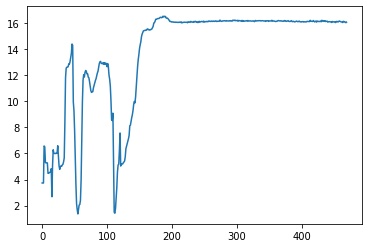

70
loss:  0.10363245755434036    grad:  0.508866548538208
71
loss:  0.10365068167448044    grad:  1.9869803190231323
72
loss:  0.1039746105670929    grad:  2.494361639022827
73
loss:  0.10109079629182816    grad:  3.299433708190918
74
loss:  0.09977681934833527    grad:  3.2605717182159424
75
loss:  0.0986887589097023    grad:  1.040528416633606
76
loss:  0.10025838017463684    grad:  1.1526269912719727
77
loss:  0.09932175278663635    grad:  3.517026424407959
78
loss:  0.10506907105445862    grad:  3.9031858444213867
79
loss:  0.10473309457302094    grad:  2.992525100708008


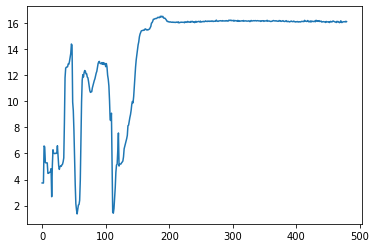

80
loss:  0.10418636351823807    grad:  1.5027812719345093
81
loss:  0.09482011944055557    grad:  0.4674660861492157
82
loss:  0.10099093616008759    grad:  2.342339038848877
83
loss:  0.10229451954364777    grad:  3.522334337234497
84
loss:  0.09950494766235352    grad:  3.2156078815460205
85
loss:  0.10556293278932571    grad:  2.0633952617645264
86
loss:  0.10340041667222977    grad:  0.6963916420936584
87
loss:  0.10259335488080978    grad:  0.6213850975036621
88
loss:  0.10957307368516922    grad:  3.626638650894165
89
loss:  0.10220356285572052    grad:  2.869490623474121


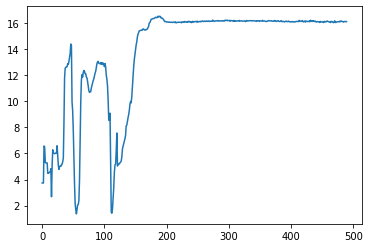

90
loss:  0.09864713996648788    grad:  2.0945799350738525
91
loss:  0.09559611976146698    grad:  0.9074568152427673
92
loss:  0.10358057171106339    grad:  1.0700944662094116
93
loss:  0.09820311516523361    grad:  1.2238954305648804
94
loss:  0.09926848858594894    grad:  0.7040013670921326
95
loss:  0.10768362879753113    grad:  2.0151824951171875
96
loss:  0.09462620317935944    grad:  1.7710787057876587
97
loss:  0.09367943555116653    grad:  0.9837051033973694
98
loss:  0.09863592684268951    grad:  0.4945923984050751
99
loss:  0.10021978616714478    grad:  0.9401933550834656


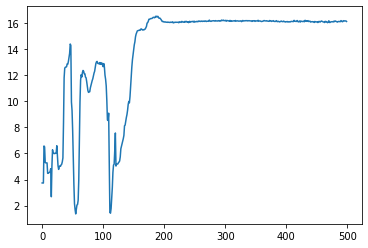

100
loss:  0.10107248276472092    grad:  1.4844850301742554
101
loss:  0.09669121354818344    grad:  0.6576067805290222
102
loss:  0.10068000108003616    grad:  1.7350281476974487
103
loss:  0.09559741616249084    grad:  0.3619435727596283
104
loss:  0.10162469744682312    grad:  0.3470550775527954
105
loss:  0.09748043864965439    grad:  0.30530670285224915
106
loss:  0.09726380556821823    grad:  1.0486704111099243
107
loss:  0.09911913424730301    grad:  1.56028413772583
108
loss:  0.09817009419202805    grad:  1.3740875720977783
109
loss:  0.09369111806154251    grad:  1.2844624519348145


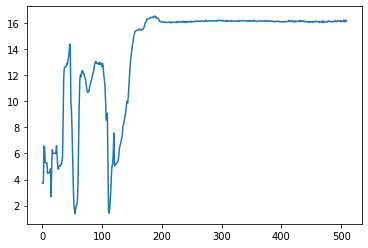

110
loss:  0.09593919664621353    grad:  0.2839411497116089
111
loss:  0.1004609763622284    grad:  0.9275505542755127
112
loss:  0.0971524715423584    grad:  1.3191817998886108
113
loss:  0.10039366036653519    grad:  1.7163448333740234
114
loss:  0.09898227453231812    grad:  1.1543477773666382
115
loss:  0.09718594700098038    grad:  0.6705930829048157
116
loss:  0.0960499569773674    grad:  1.0586808919906616
117
loss:  0.09322738647460938    grad:  1.0670931339263916
118
loss:  0.09983526170253754    grad:  1.3224917650222778
119
loss:  0.09702464938163757    grad:  0.8274667859077454


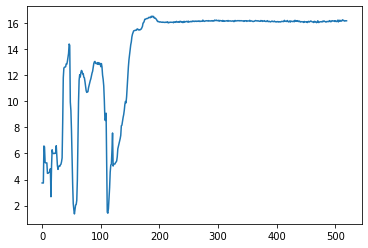

120
loss:  0.10014407336711884    grad:  0.4943877160549164
121
loss:  0.09710598737001419    grad:  0.25780853629112244
122
loss:  0.09510429203510284    grad:  0.36760860681533813
123
loss:  0.10098893940448761    grad:  2.2358996868133545
124
loss:  0.0941101536154747    grad:  0.2976208031177521
125
loss:  0.09661800414323807    grad:  0.30816492438316345
126
loss:  0.09492044895887375    grad:  0.5585388541221619
127
loss:  0.09134554117918015    grad:  0.3404933214187622
128
loss:  0.10192394256591797    grad:  0.5871753692626953
129
loss:  0.09459151327610016    grad:  0.6750736832618713


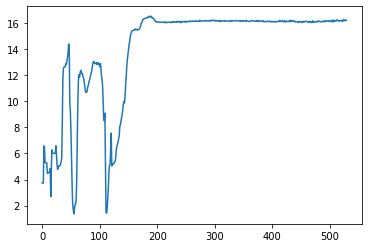

130
loss:  0.09344537556171417    grad:  0.33240067958831787
131
loss:  0.09598889201879501    grad:  0.8493265509605408
132
loss:  0.09703098982572556    grad:  0.39735865592956543
133
loss:  0.0938488021492958    grad:  0.5242837071418762
134
loss:  0.09471341967582703    grad:  0.5120529532432556
135
loss:  0.09400411695241928    grad:  0.8606932759284973
136
loss:  0.09624452888965607    grad:  0.27271050214767456
137
loss:  0.09704035520553589    grad:  0.8039236664772034
138
loss:  0.09716447442770004    grad:  0.7881746888160706
139
loss:  0.0917900875210762    grad:  0.34645625948905945


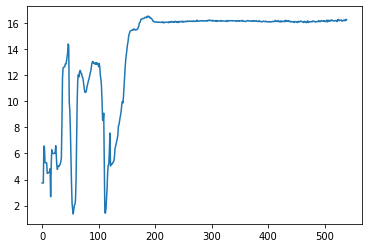

140
loss:  0.0967196375131607    grad:  1.2674834728240967
141
loss:  0.09702976047992706    grad:  1.7718545198440552
142
loss:  0.09241167455911636    grad:  0.6198892593383789
143
loss:  0.09146778285503387    grad:  0.8960960507392883
144
loss:  0.0956210047006607    grad:  0.3263355791568756
145
loss:  0.09493981301784515    grad:  0.3916122317314148
146
loss:  0.09628812968730927    grad:  0.32189226150512695
147
loss:  0.09767323732376099    grad:  0.9112661480903625
148
loss:  0.09206994622945786    grad:  0.27969735860824585
149
loss:  0.0929085910320282    grad:  0.714934766292572


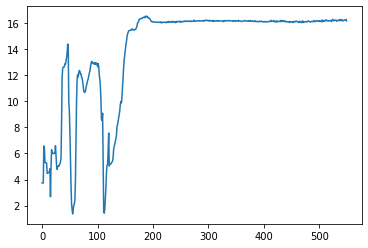

150
loss:  0.09171941131353378    grad:  0.784804105758667
151
loss:  0.09542860835790634    grad:  0.2816121578216553
152
loss:  0.09562963992357254    grad:  1.539088487625122
153
loss:  0.09383715689182281    grad:  0.5281010866165161
154
loss:  0.09758762270212173    grad:  0.5958744883537292
155
loss:  0.0929669514298439    grad:  0.41194820404052734
156
loss:  0.09634116291999817    grad:  0.9287929534912109
157
loss:  0.09006647765636444    grad:  0.2841264605522156
158
loss:  0.09426696598529816    grad:  0.96698397397995
159
loss:  0.09865254163742065    grad:  1.6629440784454346


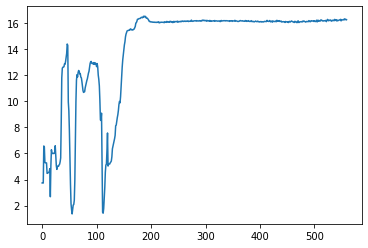

160
loss:  0.09120728075504303    grad:  1.5884510278701782
161
loss:  0.09688074886798859    grad:  0.28494754433631897
162
loss:  0.098078653216362    grad:  1.4023633003234863
163
loss:  0.09879370033740997    grad:  0.2626631557941437
164
loss:  0.09338876605033875    grad:  1.2809323072433472
165
loss:  0.09774594753980637    grad:  1.1856755018234253
166
loss:  0.09591717272996902    grad:  0.38828733563423157
167
loss:  0.09556642919778824    grad:  0.33152511715888977
168
loss:  0.09785187989473343    grad:  0.8771706819534302
169
loss:  0.0909966304898262    grad:  0.3629904091358185


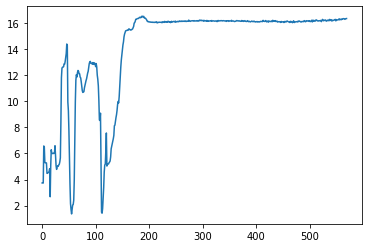

170
loss:  0.09222552925348282    grad:  0.4212096333503723
171
loss:  0.09334038197994232    grad:  0.24451801180839539
172
loss:  0.09485815465450287    grad:  0.3490225672721863
173
loss:  0.09718012809753418    grad:  0.4809494912624359
174
loss:  0.09246877580881119    grad:  0.7603524327278137
175
loss:  0.08763952553272247    grad:  0.30772387981414795
176
loss:  0.09318417310714722    grad:  0.4287952482700348
177
loss:  0.09746535122394562    grad:  0.7535092234611511
178
loss:  0.09205741435289383    grad:  0.40379393100738525
179
loss:  0.0896860733628273    grad:  1.3320834636688232


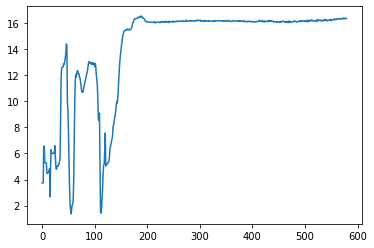

180
loss:  0.0922383964061737    grad:  0.27799513936042786
181
loss:  0.09605684876441956    grad:  0.2592569589614868
182
loss:  0.09224909543991089    grad:  1.0927488803863525
183
loss:  0.09892519563436508    grad:  0.6616441607475281
184
loss:  0.09523937106132507    grad:  1.6755152940750122
185
loss:  0.09424914419651031    grad:  1.3488264083862305
186
loss:  0.0928187444806099    grad:  0.3075823187828064
187
loss:  0.09248147904872894    grad:  0.7149171829223633
188
loss:  0.0956149622797966    grad:  0.39438509941101074
189
loss:  0.09074382483959198    grad:  0.6609482169151306


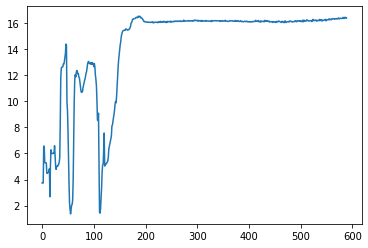

190
loss:  0.08794812858104706    grad:  0.9764379858970642
191
loss:  0.09499453753232956    grad:  0.7503185868263245
192
loss:  0.09827135503292084    grad:  1.0002233982086182
193
loss:  0.09224099665880203    grad:  0.3898477554321289
194
loss:  0.0921843945980072    grad:  0.2526463568210602
195
loss:  0.08341798931360245    grad:  0.30371782183647156
196
loss:  0.0930776372551918    grad:  0.660874605178833
197
loss:  0.0955410897731781    grad:  0.25526100397109985
198
loss:  0.09208264946937561    grad:  0.8408563137054443
199
loss:  0.09243576228618622    grad:  0.41422706842422485


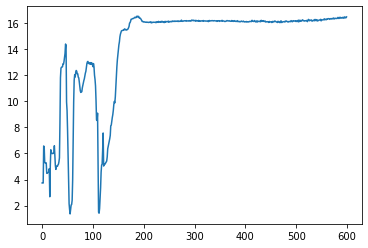

In [19]:
# set the length of one sample
# the environment will be stopped after 500 steps
# 1 sample = 500 steps
epi_length = 500
commu_flag = False

# set the learning rate
learner.set_sgd(0.0001, mmt=0.95)

# Training START!
for episode in range(200): # train 100 episode at a time, so I can change the hyperparameters every 100 episodes
    print(episode)
    if episode % 2000 == 0: # the 'if clause' only is True when episode == 0, now.
        #epi_length += 100
        #print(epi_length)
        
        # set/initialize parallel runner, it helps run 'batch size'(8) samples in one episode.
        # explore_episilon is the epsilon greedy parameter, 1.0 for all exploration, 0.0 for no exploration
        runner = ParallelRun(env, test_controller, epi_length, explore_epsilon=0.2, test_mode = False, commu = commu_flag)
        test_runner = ParallelRun(env, test_controller, epi_length, test_mode = True, commu = commu_flag)
        #test_runner2 = ParallelRun(env2, test_controller, epi_length, test_mode = True, commu = commu_flag)
    
    # The following line and the line follows the following line is equivalent, they are sampling 8 samples
    #batch = [run(env, test_controller, epi_length, explore_epsilon=0., test_mode = False, 
    #             commu = commu_flag, seed_i = torch.tensor(ii)) for ii in range(6)]
    batch = runner.run(batch_size)
    # Transform the training data into a convenient formation.
    for key in batch[0].keys():
        batch[0][key] = torch.stack([batch[i][key] for i in range(batch_size)], dim=0)
        if cuda_flag:
            batch[0][key] = batch[0][key].cuda()
    batch = batch[0]

    # train one step. At the same time, check the training loss and the norm of grad.
    if commu_flag:
        loss, grad, diff = learner.train(batch, commu=commu_flag)
    else:
        loss, grad = learner.train(batch, commu=commu_flag)
    #loss, grad = learner.train(batch, commu=True)
    # For DQN, it is necessary to update the target network, maybe not important for you
    learner._update_targets()

    # Save the results
    loss_history.append(loss)
    if commu_flag:
        mess_history.append(diff)
        print('loss: ', loss.item(), '   grad: ', grad.item(), '   mess: ', diff.item())
    else:
        print('loss: ', loss.item(), '   grad: ', grad.item())

    # save and update the test controller
    controller.save('state_dicts/' + filename + '.pth')
    test_controller.load('state_dicts/' + filename + '.pth')

    # The test result also parallel in 8 samples, The following is the Test of the training model
    test = test_runner.run(8)
    #test = [run(env, test_controller, epi_length, test_mode = True, commu = commu_flag, seed_i = torch.tensor(ii)) for ii in range(6)]
    test = np.mean(test)
    # save test reward    
    r_history.append(test)
    
    #test = test_runner2.run(6)
    #test = np.mean(test)
    
    # save test reward
    #r_history2.append(test)

    # plot the test reward history every 10 episodes
    if episode % 10 == 9:
        #plt.figure(figsize = [16, 5])
        #plt.subplot(121)
        plt.plot(torch.tensor(r_history))
        #plt.subplot(122)
        #plt.plot(r_history2[:])
        plt.show()

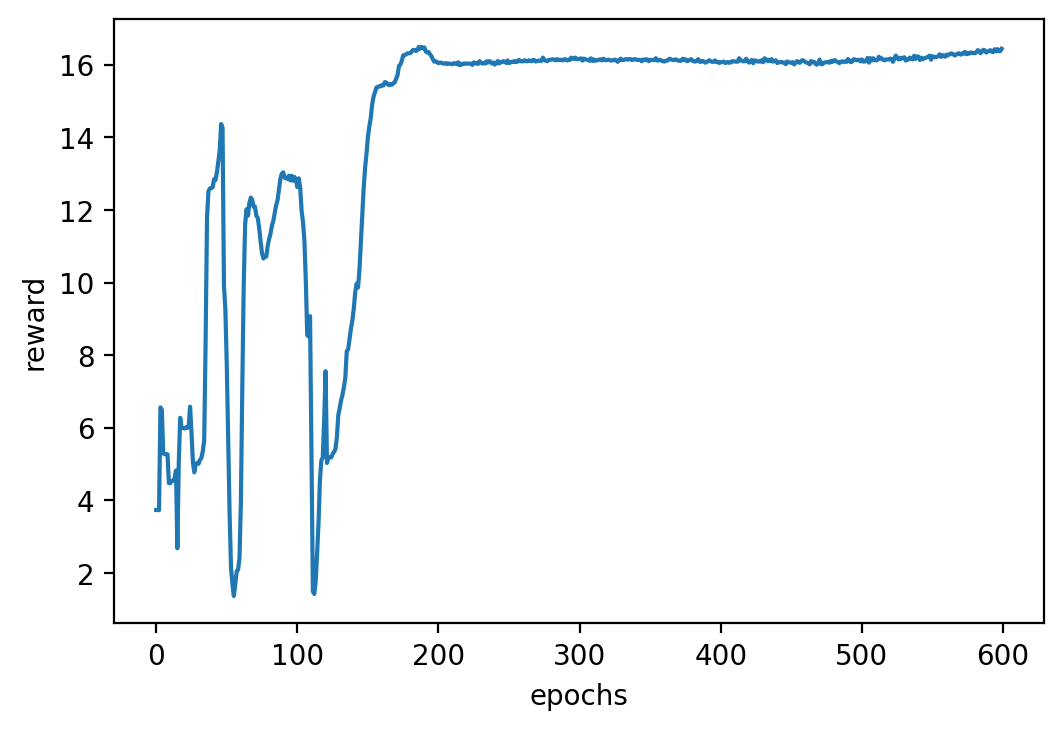

In [20]:
plt.figure(dpi=200)
plt.xlabel('epochs')
plt.ylabel('reward')
#plt.title('finetune on seed 0')
plt.plot(torch.tensor(r_history[:]))
plt.show()

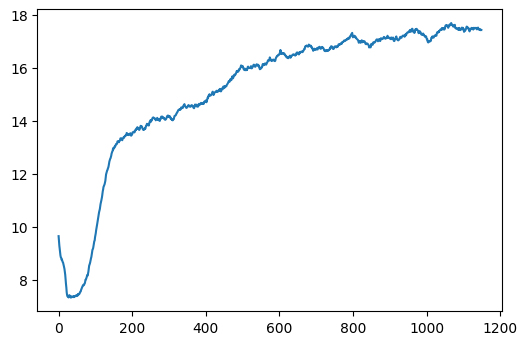

In [11]:
x = 0
r = []
for i in range(len(r_history)):
    x += r_history[i]
    if i >= 50:
        x -= r_history[i - 50]
        r.append(x / 50)
plt.figure(dpi=100)
plt.plot(r)
plt.show()

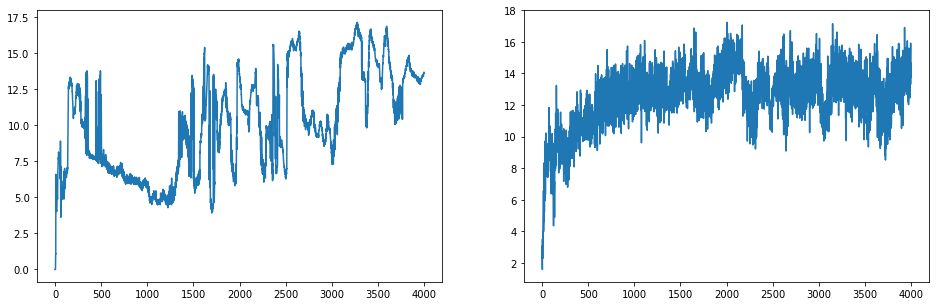

In [67]:
plt.figure(figsize = [16, 5])
plt.subplot(121)
plt.plot(r_history[0][:])
plt.subplot(122)
plt.plot(r_history[1][:])
plt.show()

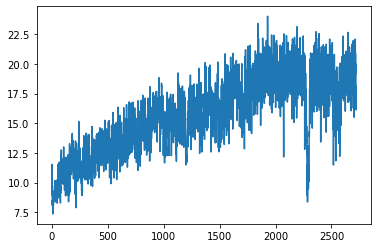

In [16]:
plt.plot(r_history[300:])
plt.show()

In [9]:
# model test
agent = test_controller
agent.init_hidden(1)

gamma = 0.98

rl = []

c = 0
c0 = 0

for _ in range(50):
    obs = env.reset()
    r = 0

    for t in range(500):
        action = agent.choose_action(obs.unsqueeze(0), test_mode = True, commu = commu_flag)

        obs, reward = env.step(action)
        r += (1 - gamma) * (reward - r)
        
        c += 1
        plan = torch.tensor(env.plan).tolist()
        if len(plan) == len(set(plan)):
            c0 += 1
    rl.append(r)

In [10]:
rl = torch.tensor(rl)
print(rl.mean())
print(torch.sqrt(rl.var()))

tensor(25.4286)
tensor(0.1807)


In [11]:
1 - c0 / c

0.0048799999999999955

In [12]:
torch.save({
            'net_sd': {
                        'agent':controller.agent.state_dict(), 
                        'blender':controller.env_blender.state_dict()
                      },
            'qmixer': learner.mixer.state_dict(),
            'history':{
                        'rh':r_history,
                        'mh':mess_history,
                        'lh':loss_history,
                      },
            'parameters':{
                            'ini_pos': t_ues,
                            'commu_flag': commu_flag,
                            'RW': rw,
                            'noise_dbm': noise_dbm,
                         },
            'result':{
                        'rmean': rl.mean(),
                        'rsd': torch.sqrt(rl.var()),
                        'conflict_rate': 1 - c0 / c,
                     }
            }, 
            'exp_res/' + filename + '.pth')

In [21]:
# heuristic test

gamma = 0.98

rl = []

pos = torch.tensor([[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]])

c = 0
c0 = 0

for _ in range(50):
    obs = env.reset()
    r = 0

    for t in range(500):
        # 4, 5, 3
        action = []
        for i in range(4):
            temp = obs[i]
            dis = ((temp[:, 1:3])**2).sum(-1)
            inds = torch.argsort(dis)
            for j in inds:
                if temp[j, -1] < 3.:
                    break
            if temp[j, -1] >= 3.:
                j = torch.tensor(5)
            action.append(j.view(1))
        action = torch.cat(action)

        obs, reward = env.step(action)
        r += (1 - gamma) * (reward - r)
        #print(r)
        
        c += 1
        plan = torch.tensor(env.plan).tolist()
        if len(plan) == len(set(plan)):
            c0 += 1
    rl.append(r)

In [22]:
rl = torch.tensor(rl)
print(rl.mean())
print(torch.sqrt(rl.var()))

tensor(19.7700)
tensor(3.9460)


In [23]:
1 - c0 / c

0.3318

In [64]:
# heuristic test 2

gamma = 0.98

rl = []

pos = torch.tensor([[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]])

for _ in range(50):
    obs = env.reset() # 4, 5, 4
    r = 0

    for t in range(500):
        # 4, 5, 3
        action = []
        dist = (obs[:, :, 1:3] ** 2).sum(-1)
        inds = torch.argsort((obs[:, :, 1:3] ** 2).sum(-1), dim=1)
        action_pointer = torch.tensor([0, 0, 0, 0])
        for i in range(4):
            #print(i)
            while action_pointer[i] < 5 and obs[i, inds[i, action_pointer[i]], 3] >= 3.:
                action_pointer[i] += 1
        i = 0
        while i < 4:
            if action_pointer[i] == 5:
                i += 1
            else:
                dup_flag = False
                for j in range(4):
                    if i != j and action_pointer[j] != 5:
                        if obs[i, inds[i, action_pointer[i]], 0] == obs[j, inds[j, action_pointer[j]], 0]:
                            dup_flag = True
                            break
                if dup_flag:
                    dist_i = dist[i, inds[i, action_pointer[i]]]
                    dist_j = dist[j, inds[j, action_pointer[j]]]
                    if dist_i > dist_j:
                        j = i
                    action_pointer[j] += 1
                    while action_pointer[j] < 5 and obs[j, inds[j, action_pointer[j]], 3] >= 3.:
                        action_pointer[j] += 1
                    i = 0
                else:
                    i += 1
        action = [5 if action_pointer[i] == 5 else inds[i, action_pointer[i]] for i in range(4)]

        obs, reward = env.step(action)
        r += (1 - gamma) * (reward - r)
        #print(r)

    rl.append(r)

In [65]:
rl = torch.tensor(rl)
print(rl.mean())
print(torch.sqrt(rl.var()))

tensor(24.5279)
tensor(0.0908)


In [11]:
# nearest test

gamma = 0.98

rl = []

pos = torch.tensor([[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]])

for _ in range(20):
    obs = env.reset()
    r = 0

    for t in range(500):
        # 4, 5, 3
        action = []
        for i in range(4):
            temp = obs[i]
            dis = ((temp[:, 1:3])**2).sum(-1)
            inds = torch.argsort(dis)
            action.append(inds[0:1].view(1))
        action = torch.cat(action)
        #print(t)
        #print(obs)
        #print(action)
        #print(env.get_global_obs())
        #print(env.enbs_pos)

        obs, reward = env.step(action)
        r += (1 - gamma) * (reward - r)
    rl.append(r)

In [12]:
rl = torch.tensor(rl)
print(rl.mean())
print(rl.var())

tensor(9.4039)
tensor(9.5736e-13)


In [16]:
# constent test

gamma = 0.98

obs = env.reset()
r = 0

for t in range(50):
    action = torch.tensor([0, 0, 0, 0])
    print(env.MA_rate)

    obs, reward = env.step(action)
    r += (1 - gamma) * (reward - r)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0.3532, 0.4781, 0.0000, 0.0000, 0.0000, 0.7600, 0.0000, 0.0000, 0.5405,
        0.0000])
tensor([0.6710, 0.9084, 0.0000, 0.0000, 0.0000, 1.4439, 0.0000, 0.0000, 1.0269,
        0.0000])
tensor([0.9571, 1.2956, 0.0000, 0.0000, 0.0000, 2.0595, 0.0000, 0.0000, 1.4647,
        0.0000])
tensor([1.2146, 1.6442, 0.0000, 0.0000, 0.0000, 2.6135, 0.0000, 0.0000, 1.8587,
        0.0000])
tensor([1.4463, 1.9578, 0.0000, 0.0000, 0.0000, 3.1121, 0.0000, 0.0000, 2.2133,
        0.0000])
tensor([1.6549, 2.2401, 0.0000, 0.0000, 0.0000, 3.5608, 0.0000, 0.0000, 2.5324,
        0.0000])
tensor([1.8426, 2.4942, 0.0000, 0.0000, 0.0000, 3.9647, 0.0000, 0.0000, 2.8197,
        0.0000])
tensor([2.0115, 2.7229, 0.0000, 0.0000, 0.0000, 4.3282, 0.0000, 0.0000, 3.0782,
        0.0000])
tensor([2.1635, 2.9287, 0.0000, 0.0000, 0.0000, 4.6553, 0.0000, 0.0000, 3.3108,
        0.0000])
tensor([2.3003, 3.1139, 0.0000, 0.0000, 0.0000, 4.9497, 0.0000, 0.0000, 3.5202

In [30]:
# first episode test, not important now, I guess
agent = test_controller
agent.init_hidden(1)

obs = torch.tensor([[[[0.2268, 0.1831, 0.0000],
          [0.5368, 0.1770, 0.0000],
          [0.1830, 0.7468, 0.0000],
          [0.0806, 0.3042, 0.0000],
          [0.4744, 0.7331, 0.0000]],

         [[0.2268, 0.1831, 0.0000],
          [0.5368, 0.1770, 0.0000],
          [0.8217, 0.0564, 0.0000],
          [0.7883, 0.2845, 0.0000],
          [0.9292, 0.6769, 0.0000]],

         [[0.1830, 0.7468, 0.0000],
          [0.0502, 0.8496, 0.0000],
          [0.0806, 0.3042, 0.0000],
          [0.4744, 0.7331, 0.0000],
          [0.4934, 0.9250, 0.0000]],

         [[0.1830, 0.7468, 0.0000],
          [0.7883, 0.2845, 0.0000],
          [0.4744, 0.7331, 0.0000],
          [0.9292, 0.6769, 0.0000],
          [0.4934, 0.9250, 0.0000]]]])

pos = torch.tensor([[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]])

for i in range(4):
    x = obs[0][i]
    print(((x[:, :2]-pos[i])**2).sum(1))
    print(torch.argsort(((x[:, :2]-pos[i])**2).sum(1)))

agent.forward(obs)

tensor([0.0050, 0.0876, 0.2513, 0.0316, 0.2837])
tensor([0, 3, 1, 2, 4])
tensor([0.2782, 0.0508, 0.0426, 0.0027, 0.2144])
tensor([3, 2, 1, 4, 0])
tensor([0.0045, 0.0498, 0.2274, 0.0506, 0.0899])
tensor([0, 1, 3, 4, 2])
tensor([0.3215, 0.2182, 0.0762, 0.0375, 0.0965])
tensor([3, 2, 4, 1, 0])


(tensor([[[0.0536, 0.0370, 0.0519, 0.0680, 0.0526, 0.0566],
          [0.0637, 0.0394, 0.0660, 0.0668, 0.0602, 0.0531],
          [0.0502, 0.0304, 0.0648, 0.0611, 0.0620, 0.0331],
          [0.0537, 0.0373, 0.0598, 0.0683, 0.0571, 0.0551]]]),
 tensor([[[ 0.0628, -0.0453,  0.0867, -0.0275,  0.0460, -0.0757, -0.0337,
            0.0041, -0.0213, -0.0411,  0.0238, -0.0190,  0.0544,  0.0082,
           -0.0514, -0.0607,  0.0415, -0.0998,  0.0469, -0.0775,  0.0585,
            0.0104,  0.0288, -0.0002,  0.0504, -0.0654,  0.0628, -0.0554,
           -0.0609, -0.0271, -0.0159,  0.0404, -0.0322,  0.0530, -0.0361,
           -0.0637, -0.0486,  0.0100,  0.0101,  0.0223, -0.0347,  0.0004,
           -0.0024, -0.0378, -0.0458, -0.0320,  0.0265,  0.0273, -0.0461,
            0.0854,  0.0153,  0.0345,  0.0765, -0.0362, -0.0024,  0.0214,
           -0.0068, -0.0164,  0.0161,  0.0615, -0.0115, -0.0527,  0.0530,
           -0.0393],
          [ 0.0467, -0.0423,  0.0567, -0.0016,  0.0106, -0.0584, -0.05